# Liquidity Constraints and Precautionary Saving

This notebook generates the figures for the paper [Liquidity Constraints and Precautionary Saving](https://econ.jhu.edu/people/ccarroll/papers/LiqConstr) by Carroll, Holm, and Kimball.

The file structure is as follows:

| Path | Content | 
| --- | --- |
|./Figures/       | Figures created by the code |
| do_all.py | iPython-runnable |
| LiqConstr.tex | LaTeX to create the paper |



In [1]:
# This cell does some setup and imports generic tools used to produce the figures

# Import related generic python packages
import numpy as np

# This is a jupytext paired notebook that autogenerates LiqConstr.py
# which can be executed from a terminal command line via "ipython LiqConstr.py"
# But a terminal does not permit inline figures, so we need to test jupyter vs terminal
# Google "how can I check if code is executed in the ipython notebook"
def in_ipynb():
    try:
        if str(type(get_ipython())) == "<class 'ipykernel.zmqshell.ZMQInteractiveShell'>":
            return True
        else:
            return False
    except NameError:
        return False

# Determine whether to make the figures inline (for spyder or jupyter)
# vs whatever is the automatic setting that will apply if run from the terminal
if in_ipynb():
    # %matplotlib inline generates a syntax error when run from the shell
    # so do this instead
    get_ipython().run_line_magic('matplotlib', 'inline') 
else:
    get_ipython().run_line_magic('matplotlib', 'auto') 
    
import matplotlib.pyplot as plt

# In order to use LaTeX to manage all text layout in our figures, we import rc settings from matplotlib.
from matplotlib import rc
rc('text', usetex= True)
plt.rc('text', usetex= True)
plt.rc('font', family='serif')

# The warnings package allows us to ignore some harmless but alarming warning messages
import warnings
warnings.filterwarnings("ignore")

# The tools for navigating the filesystem
import sys
import os

# Find pathname to this file:
my_file_path = os.path.dirname(os.path.abspath("LiqConstr.ipynb"))
figures_dir = os.path.join(my_file_path, "Figures") # Relative directory for primitive parameter files

sys.path.insert(0, figures_dir)
sys.path.insert(0, my_file_path)

Now we can start making the figures.  We start by importing the relevant subclass of AgentType into our workspace.

In [2]:
# Load consumer type from HARK
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType

Define all parameters of three type of settings that we need to produce the three figures in the paper. 


In [3]:
# Common parameters for all models (the initialized lifecycle perfect foresight type with no borrowing constraint)

# load default parameteres from the lifecycle model in the HARK toolbox
from HARK.ConsumptionSaving.ConsIndShockModel import init_lifecycle

# remove all risk and growth factors, borrowing constraints, and set the solver to always use linear interpolation
init_lifecycle["PermGroFac"] = [1,1,1,1,1,1,1,1,1,1]
init_lifecycle["LivPrb"] = [1,1,1,1,1,1,1,1,1,1]
init_lifecycle["DiscFac"] = 1/1.03
init_lifecycle["T_retire"] = 11
init_lifecycle["UnempPrb"] = 0
init_lifecycle["TranShkStd"] = [0,0,0,0,0,0,0,0,0,0,0]
init_lifecycle["PermShkStd"] = [0,0,0,0,0,0,0,0,0,0,0]
init_lifecycle["BoroCnstArt"] = [None,None,None,None,None,None,None,None,None,None]
init_lifecycle["CubicBool"] = False

# add the second type of lifecycle agent with unemployment risk
init_lifecycle_risk1 = dict(init_lifecycle)
init_lifecycle_risk1["IncUnemp"] = 0.1955
init_lifecycle_risk1["UnempPrb"] = 0.05

# the lifecycle type with only one-period transitory risk
init_lifecycle_risk2 = dict(init_lifecycle)
init_lifecycle_risk2["TranShkStd"] = [0,0.5,0,0,0,0,0,0,0,0,0]


## Counterclockwise Concavification


Figure 1: Counterclockwise Concavifications


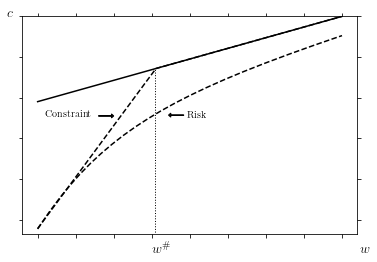

In [4]:
# This figure illustrates how both risks and constraints are examples of counterclockwise concavifications. 
# It plots three lines: the linear consumption function of a perfect foresight consumer, the kinked consumption 
# function of a consumer who faces a constraint, and the curved consumption function of a consumer that faces risk. 

# load the three agents: unconstrained perfect foresight, constrained perfect foresight, unconstrained with risk

CCC_unconstr = IndShockConsumerType(**init_lifecycle)
CCC_unconstr.delFromTimeInv('BoroCnstArt')
CCC_unconstr.addToTimeVary('BoroCnstArt')
CCC_unconstr.solve()
CCC_unconstr.unpack("cFunc")

CCC_constraint = IndShockConsumerType(**init_lifecycle)
CCC_constraint.delFromTimeInv('BoroCnstArt')
CCC_constraint.addToTimeVary('BoroCnstArt')
CCC_constraint.BoroCnstArt = [None,-1,None,None,None,None,None,None,None,None]
CCC_constraint.solve()
CCC_constraint.unpack("cFunc")

CCC_risk = IndShockConsumerType(**init_lifecycle_risk1)
CCC_risk.delFromTimeInv('BoroCnstArt')
CCC_risk.addToTimeVary('BoroCnstArt')
CCC_risk.solve()
CCC_risk.unpack("cFunc")

# save the data in a txt file for later plotting in Matlab
x = np.linspace(-1,1,500,endpoint=True)
y = CCC_unconstr.cFunc[0](x)
y2 = CCC_constraint.cFunc[0](x)  
y3 = CCC_risk.cFunc[0](x)
with open(os.path.join(figures_dir, 'CounterclockwiseConcavifications.txt'),'w') as table:
    for row in zip(x,y,y2,y3):
        for cell in row:
            table.write(str(cell) + ';')
        table.write('\n')

# Display the figure
print('Figure 1: Counterclockwise Concavifications')
f = plt.figure()
plt.plot(x,y,color="black")
plt.plot(x,y2,color="black",linestyle="--")
plt.plot(x,y3,color="black",linestyle="--")
plt.tick_params(labelbottom=False, labelleft=False,left='off',right='off',bottom='off',top='off')    

plt.text(-1.2,1.0,"$c$",fontsize=14)    
plt.text(1.12,0.42,"${m}$",fontsize=14) 
plt.text(-0.25,0.42,"${m}^{\#}$",fontsize=14) 
plt.plot([-0.23, -0.23],[0.45,0.87],color="black",linestyle=":",linewidth=1)
plt.ylim(0.465,1.0)

plt.arrow(-0.6,0.755,0.1,0,head_width=0.01,width=0.001,facecolor='black',length_includes_head='True')
plt.arrow(-0.04,0.757,-0.1,0,head_width=0.01,width=0.001,facecolor='black',length_includes_head='True')

plt.text(-0.02,0.75,"Risk",fontsize=10)
plt.text(-0.95,0.75,"Constraint",fontsize=10)


plt.show()
f.savefig(os.path.join(figures_dir, 'CounterclockwiseConcavifications.pdf'))
f.savefig(os.path.join(figures_dir, 'CounterclockwiseConcavifications.png'))
f.savefig(os.path.join(figures_dir, 'CounterclockwiseConcavifications.svg'))

## How a current constraint can hide a future kink


Figure 2: How a Current Constraint Can Hide a Future Kink


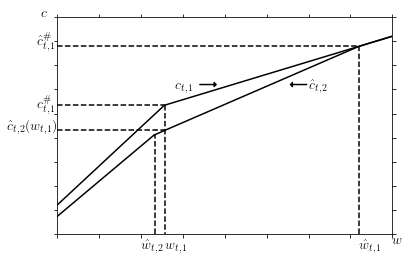

In [5]:
# This figure illustrates how a the introduction of a current constraint can hide/move a kink that was induced by a future constraint. 

# To construct this figure, we plot two consumption functions: 
# 1) perfect foresight consumer that faces one constraint in period 2
# 2) perfect foresight consumer that faces the same constraint as above plus one more constraint in period 3

# Both consumption functions first loads the parameter set of the perfect foresight lifecycle households with ten periods. 
# We then change the parameter "BoroCnstArt" which corresponds to big Tau in the paper, i.e. the set of future constraints ordered by time.

# Make and solve the consumer with only one borrowing constraint
Bcons1 = IndShockConsumerType(**init_lifecycle)
Bcons1.delFromTimeInv('BoroCnstArt')
Bcons1.addToTimeVary('BoroCnstArt')
Bcons1.BoroCnstArt = [None,0,None,None,None,None,None,None,None,None]
Bcons1.solve()
Bcons1.unpack("cFunc")

# Make and solve the consumer with more than one binding borrowing constraint
BCons2 = IndShockConsumerType(**init_lifecycle)
BCons2.delFromTimeInv('BoroCnstArt')
BCons2.addToTimeVary('BoroCnstArt')
BCons2.BoroCnstArt = [None,0,0.02,None,None,None,None,None,None,None]
BCons2.solve()
BCons2.unpack("cFunc")

# save the data in a txt file
x = np.linspace(1,1.2,500,endpoint=True)
y = Bcons1.cFunc[0](x)
y2 = BCons2.cFunc[0](x)  
with open(os.path.join(figures_dir, 'CurrConstrHidesFutKink.txt'),'w') as table:
    for row in zip(x,y,y2):
        for cell in row:
            table.write(str(cell) + ';')
        table.write('\n')

# Display the figure
print('Figure 2: How a Current Constraint Can Hide a Future Kink')

f = plt.figure()
plt.plot(x,y,color="black")
plt.plot(x,y2,color="black")
plt.text(1.15,1.01,"$\hat{c}_{t,2}$",fontsize=14)
plt.text(1.07,1.01,"$c_{t,1}$",fontsize=14)
plt.arrow(1.149,1.011,-0.01,0,head_width=0.001,width=0.0001,facecolor='black',length_includes_head='True')
plt.arrow(1.085,1.011,0.01,0,head_width=0.001,width=0.0001,facecolor='black',length_includes_head='True')

plt.xlim(left=1.0,right=1.2)
plt.ylim(0.98,1.025)
plt.tick_params(labelbottom=False, labelleft=False,left='off',right='off',bottom='off',top='off')    

plt.text(0.99,1.025,"$c$",fontsize=14)    
plt.text(1.20,0.978,"${m}$",fontsize=14)  

plt.text(0.97, 1.0015,"$\hat{c}_{t,2}({m}_{t,1})$", fontsize=14) 
plt.text(0.988, 1.006,"${c}_{t,1}^{\#}$", fontsize=14) 
plt.text(0.988, 1.019,"$\hat{c}_{t,1}^{\#}$", fontsize=14)    

plt.text(1.064, 0.977,"${m}_{t,1}$", fontsize=14) 
plt.text(1.05, 0.977,"$\hat{{m}}_{t,2}$", fontsize=14) 
plt.text(1.18, 0.977,"$\hat{{m}}_{t,1}$", fontsize=14)        

plt.plot([1, 1.064],[1.0068,1.0068],color="black",linestyle="--")
plt.plot([1, 1.064],[1.0015, 1.0015],color="black",linestyle="--")
plt.plot([1, 1.18],[1.019, 1.019],color="black",linestyle="--")
plt.plot([1.058, 1.058],[0.98, 1.0008],color="black",linestyle="--")
plt.plot([1.18, 1.18],[0.98, 1.019],color="black",linestyle="--")
plt.plot([1.064, 1.064],[1.0068, 0.98],color="black",linestyle="--")
plt.show()
f.savefig(os.path.join(figures_dir, 'CurrConstrHidesFutKink.pdf'))
f.savefig(os.path.join(figures_dir, 'CurrConstrHidesFutKink.png'))
f.savefig(os.path.join(figures_dir, 'CurrConstrHidesFutKink.svg'))

## Consumption function with and without a constraint and a risk

Figure 3: Consumption Functions With and Without a Constraint and a Risk


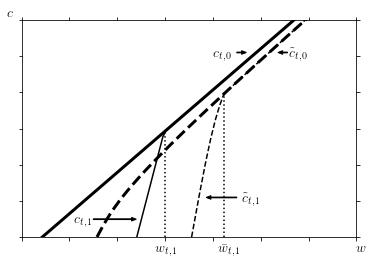

In [6]:
# This figure illustrates how the effect of risk is greater if there already exists a constraint. 

# Initialize four types: unconstrained perfect foresight, unconstrained with risk, constrained perfect foresight, and constrained with risk. 

WwCR_unconstr = IndShockConsumerType(**init_lifecycle)
WwCR_unconstr.delFromTimeInv('BoroCnstArt')
WwCR_unconstr.addToTimeVary('BoroCnstArt')
WwCR_unconstr.solve()
WwCR_unconstr.unpack("cFunc")

WwCR_risk = IndShockConsumerType(**init_lifecycle_risk2)
WwCR_risk.delFromTimeInv('BoroCnstArt')
WwCR_risk.addToTimeVary('BoroCnstArt')
WwCR_risk.solve()
WwCR_risk.unpack("cFunc")

WwCR_constr = IndShockConsumerType(**init_lifecycle)
WwCR_constr.cycles = 1 # Make this consumer live a sequence of periods exactly once
WwCR_constr.delFromTimeInv('BoroCnstArt')
WwCR_constr.addToTimeVary('BoroCnstArt')
WwCR_constr.BoroCnstArt = [None,None,-6,None,None,None,None,None,None,None]
WwCR_constr.solve()
WwCR_constr.unpack("cFunc")

WwCR_constr_risk = IndShockConsumerType(**init_lifecycle_risk2)
WwCR_constr_risk.delFromTimeInv('BoroCnstArt')
WwCR_constr_risk.addToTimeVary('BoroCnstArt')
WwCR_constr_risk.BoroCnstArt = [None,None,-6,None,None,None,None,None,None,None]
WwCR_constr_risk.solve()
WwCR_constr_risk.unpack("cFunc")

# save the data in a txt file
x = np.linspace(-8,-4,1000,endpoint=True)
y = WwCR_unconstr.cFunc[1](x)
y2 = WwCR_risk.cFunc[1](x)
y3 = WwCR_constr.cFunc[1](x) 
y4 = WwCR_constr_risk.cFunc[1](x) 
with open(os.path.join(figures_dir, 'ConsWithWithoutConstrAndRisk.txt'),'w') as table:
    for row in zip(x,y,y2,y3,y4):
        for cell in row:
            table.write(str(cell) + ';')
        table.write('\n')

# Display the figure
print('Figure 3: Consumption Functions With and Without a Constraint and a Risk')

f = plt.figure()
plt.plot(x,y,color="black",linewidth=3)
plt.plot(x,y2,color="black",linestyle="--",linewidth=3)
plt.plot(x,y3,color="black")
plt.plot(x,y4,color="black",linestyle="--")
plt.xlim(left=-8,right=-4.5)
plt.ylim(0,0.30)
plt.text(-8.15,0.305,"$c$",fontsize=14)    
plt.text(-4.5,-0.02,"${m}$",fontsize=14)  
plt.text(-6,0.25,"${c}_{t,0}$",fontsize=14)
plt.text(-5.2,0.25,r"$\tilde{c}_{t,0}$",fontsize=14)
plt.text(-7.45,0.02,"${c}_{t,1}$",fontsize=14)
plt.text(-5.7,0.05,r"$\tilde{c}_{t,1}$",fontsize=14)

plt.arrow(-5.22,0.255,-0.1,0,head_width=0.005,head_length=0.05,facecolor='black',length_includes_head='True')
plt.arrow(-5.75,0.255,0.1,0,head_width=0.005,head_length=0.05,facecolor='black',length_includes_head='True')
plt.arrow(-5.75,0.055,-0.32,0,head_width=0.005,head_length=0.05,facecolor='black',length_includes_head='True')
plt.arrow(-7.25,0.025,0.45,0.0,head_width=0.005,head_length=0.05,facecolor='black',length_includes_head='True')

#plt.plot([-6.15,-6.15],[0,0.05],color="black",linestyle=":")
plt.plot([-6.5,-6.5],[0,0.145],color="black",linestyle=":")
plt.plot([-5.88,-5.88],[0,0.2],color="black",linestyle=":")

#plt.text(-6.2,-0.02,r"$\underline{{m}}_{t,1}$",fontsize=14)    
plt.text(-6.6,-0.02,r"${{m}}_{t,1}$",fontsize=14)     
plt.text(-5.95,-0.02,r"$\bar{{m}}_{t,1}$",fontsize=14) 

plt.tick_params(labelbottom=False, labelleft=False,left='off',right='off',bottom='off',top='off')    

plt.show()
f.savefig(os.path.join(figures_dir, 'ConsWithWithoutConstrAndRisk.pdf'))
f.savefig(os.path.join(figures_dir, 'ConsWithWithoutConstrAndRisk.png'))
f.savefig(os.path.join(figures_dir, 'ConsWithWithoutConstrAndRisk.svg'))